<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/7_3Regresi%C3%B3n_log%C3%ADstica%2C_bosque_aleatorio_o_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clasificación multiclase
Objetivos de aprendizaje
Al final de este módulo, deberías ser capaz de:

Comprender las estrategias de clasificación multiclase
Describir las técnicas de uno contra todos y uno contra uno.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



In [ ]:
col_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

In [ ]:
filename = ('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

df = pd.read_csv(filename, header = None, names = col_names)
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Estrategias de clasificación multiclase

Si bien la regresión logística no es el único algoritmo que originalmente se diseñó para la clasificación binaria (perceptrones y máquinas de vectores de soporte), es una debilidad conocida del algoritmo. Si bien hay formas de extender la regresión logística a problemas multiclase (más de dos clases), esta sección cubre formas generales de extender los algoritmos de clasificación binaria a multiclase.

Los dos enfoques cubiertos aquí son los siguientes:

La estrategia One-vs-Rest (One-vs-All) divide una clasificación de clases múltiples en un problema de clasificación binaria por clase.
La estrategia Uno contra Uno divide una clasificación de clases múltiples en un problema de clasificación binaria por cada par de clases.


One vs All: Ejemplos teóricos
Por ejemplo, dado un problema de clasificación de clases múltiples con ejemplos para cada clase "setosa", "versicolor" y "virginica". Esto podría dividirse en tres conjuntos de datos de clasificación binaria de la siguiente manera:

Problema de clasificación binaria 1: setosa vs [versicolor, virginica]
Problema de clasificación binaria 2: versicolor vs [setosa, virginica]
Problema de clasificación binaria 3: virginica vs [setosa, versicolor]
Este enfoque requiere que cada modelo prediga una probabilidad de pertenencia a una clase o una puntuación similar a la probabilidad. El argmax de estos puntajes (índice de clase con el puntaje más grande) se usa luego para predecir una clase.

Como tal, la implementación de estos algoritmos en la librería scikit-learn implementa la estrategia OvR de forma predeterminada cuando se utilizan estos algoritmos para la clasificación de clases múltiples. La librería scikit-learn también proporciona una clase OneVsRestClassifier separada que permite usar la estrategia uno contra resto con cualquier clasificador.

In [ ]:
# Imprimir cuántas clases
print('Class labels', np.unique(df['Class label']))



Class labels [1 2 3]


In [ ]:
df['Class label'].unique()

array([1, 2, 3])

In [ ]:
# Las clases no están equilibradas
df['Class label'].value_counts(dropna = False)



2    71
1    59
3    48
Name: Class label, dtype: int64

In [ ]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'Class label')]]
y = df.loc[:, 'Class label'].values

In [ ]:
# En encuestas estadísticas,
# cuando las subpoblaciones dentro de una población general varían,
# Podría ser ventajoso muestrear cada subpoblación (estrato) de forma independiente
# La estratificación es el proceso de dividir a los miembros de la población en subgrupos homogéneos antes
# del muestreo.
#help(train_test_split)

In [ ]:
# Dividir en conjuntos de prueba y entrenamiento
# Proporcionar la matriz de etiquetas de clase y como argumento para estratificar asegura a ambos
# el conjunto de entrenamiento y los conjuntos de datos de prueba tienen las mismas proporciones de clase que el
# conjunto de datos originalcopy
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{1: 41, 2: 50, 3: 33}

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{1: 18, 2: 21, 3: 15}

In [ ]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


Tanto la precisión de entrenamiento como de prueba (ambas al 100 por ciento) indican que nuestro modelo hace un trabajo perfecto en ambos conjuntos de datos. Cuando se accede a los términos de intercepción a través del atributo `log_reg.intercept_`, vemos que la matriz devuelve tres valores.

In [ ]:
log_reg.intercept_



array([-1.26331119, -1.21573012, -2.36968986])

Dado que ajustamos el objeto regresión logística en un conjunto de datos multiclase mediante el enfoque OvR, la primera intersección pertenece al modelo que se ajusta a la clase 1 frente a las clases 2 y 3, el segundo valor es la intersección del modelo que encaja a la clase 2 frente a las clases 1 y 3, y el tercer valor es la intersección del modelo que se ajusta a la clase 3 frente a 1 y 2.

In [ ]:
log_reg.coef_

array([[ 1.24529714,  0.18124983,  0.7423646 , -1.15967918,  0.        ,
         0.        ,  1.17555337,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54102052,  2.51144956],
       [-1.53745533, -0.38731269, -0.99568406,  0.36509915, -0.05942348,
         0.        ,  0.66816318,  0.        ,  0.        , -1.93402147,
         1.23399534,  0.        , -2.23110309],
       [ 0.13489959,  0.17000539,  0.35786681,  0.        ,  0.        ,
         0.        , -2.43266199,  0.        ,  0.        ,  1.56282051,
        -0.81854154, -0.4961839 ,  0.        ]])

La matriz de peso a la que se accede mediante el atributo log_reg.coef_, que contiene tres filas de coeficientes de peso, un vector de peso para cada clase. Cada fila consta de 13 pesos, donde cada peso se multiplica por la característica respectiva en el conjunto de datos de vino de 13 dimensiones para calcular la entrada neta.



# Cómo funcionan las predicciones

Scikit-learn generará probabilidades para cada clase. La probabilidad más alta será la predicción de la clase. Entonces, si tienes tres clases, scikit-learn generará tres probabilidades para el método predict_prob. Si tienes cuatro clases, scikit-learn generará 4 probabilidades. En este caso, tenemos tres clases, por lo que el resultado nos dará tres probabilidades. Elegimos la clase con mayor probabilidad.

In [ ]:
# La primera clase es la puntuación más alta, por lo que será la predicción 0 (la primera clase) para estos datos
log_reg.predict_proba(X_test[0:1])

array([[9.76566097e-01, 4.48464617e-04, 2.29854385e-02]])

In [ ]:
# También podemos obtener la clase asociada con la probabilidad más alta
log_reg.predict(X_test[0:1])


array([1])

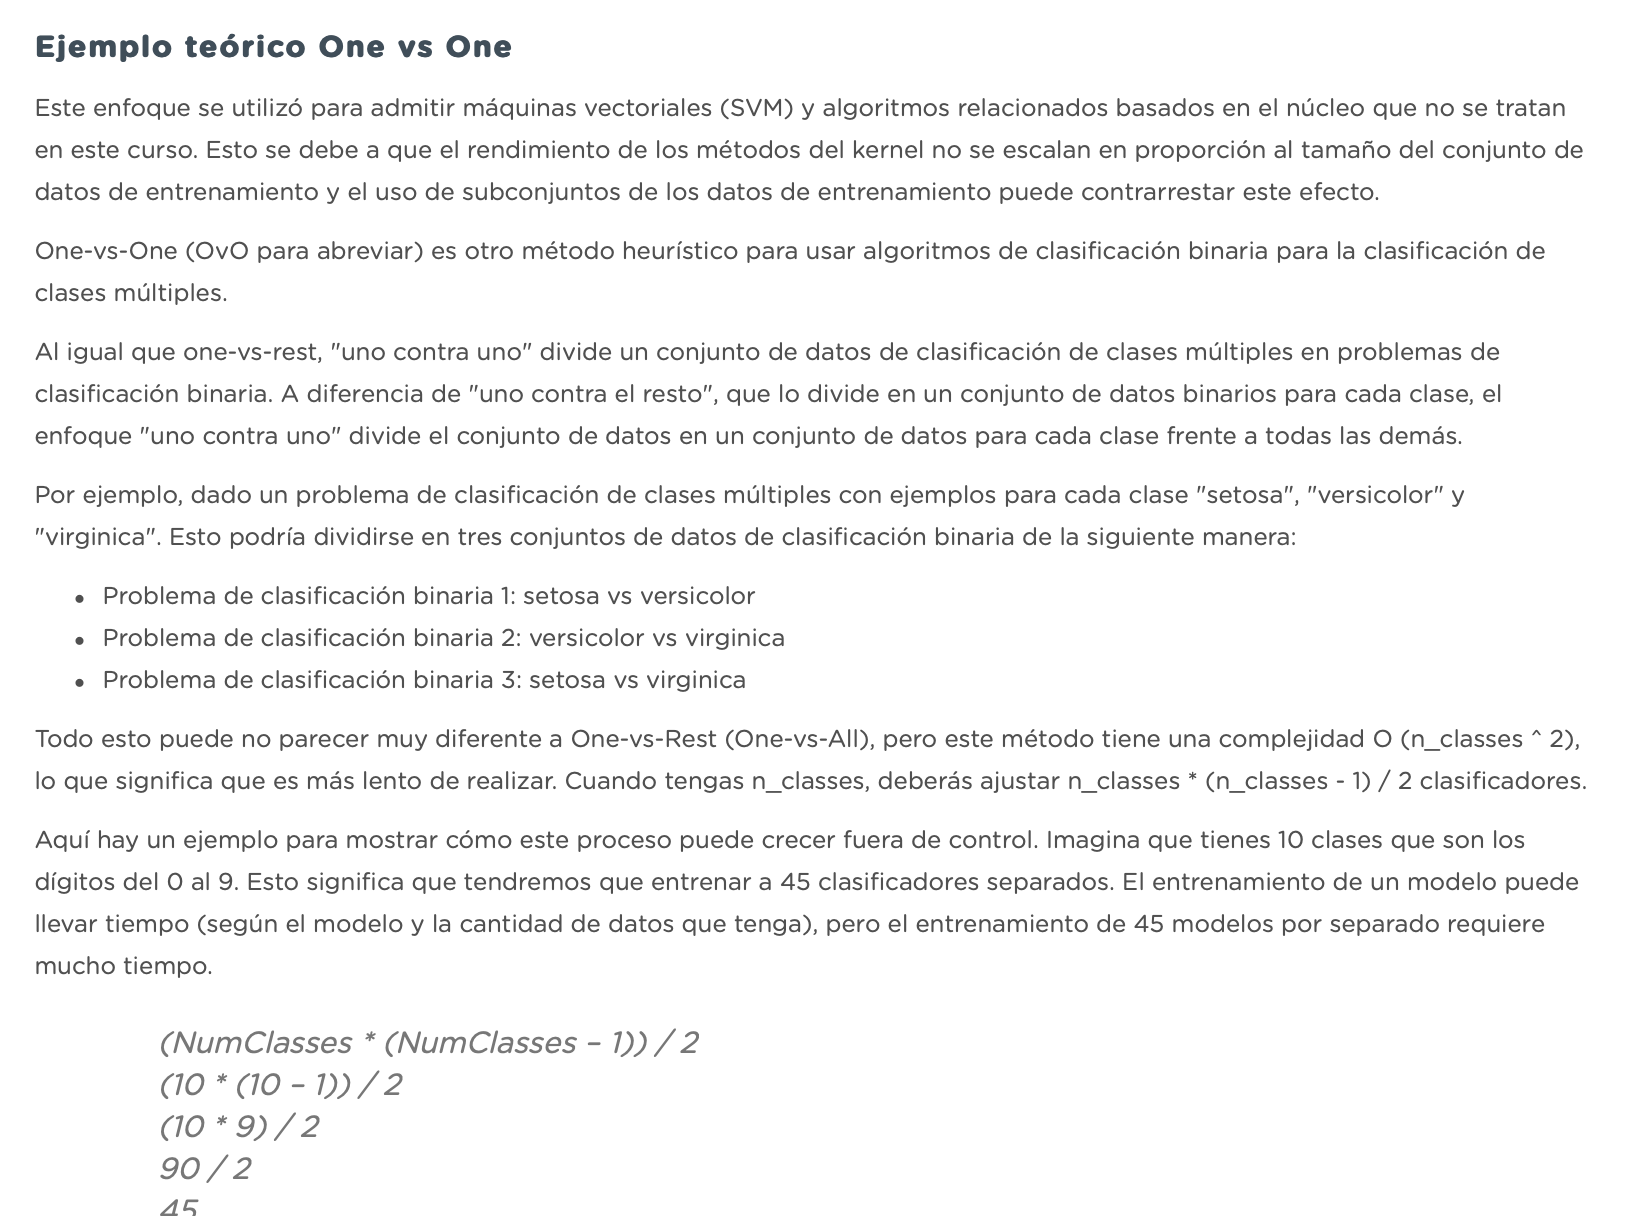